In [1]:
import fenics as fe
import matplotlib.pyplot as plt
import PySimpleGUI as sg
import time

from ipywidgets import IntProgress
from IPython.display import display

In [2]:
def logProg(sequence, every=10):
    
    progress = IntProgress(min=0, max=len(sequence), value=0)
    display(progress)

    for index, record in enumerate(sequence):
        
        if index % every == 0:
            progress.value = index
        yield record
    progress.value = len(sequence)

The heat Equation:
df=df^2+g
x=[0,1]
f(0)=f(1)=0

In [3]:
n_elements = 10000  #number of elements
mesh = fe.UnitIntervalMesh(n_elements)  #Create mesh

#Create space
space = fe.FunctionSpace(mesh, "Lagrange", 1)

In [4]:
#Boundaries
bound1 = fe.Constant(0.7)

def check_boudary(x, boundary):
    return boundary

# Constant bounaries(Dirichlet)
boundary_condition = fe.DirichletBC(
    space,
    bound1,
    check_boudary,
)

In [5]:
# Initial condition
initial_condition = fe.Expression('1', degree=1)
#Discretize the initial condition
f0 = fe.interpolate(initial_condition, space)


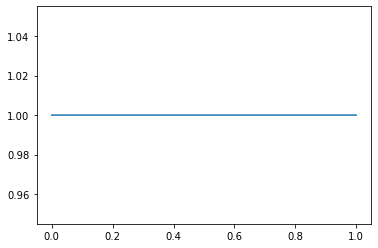

In [6]:
# Create plot
plt.figure()
fe.plot(f0, label='time=0');

In [11]:
#Time step
dt=0.1
n_dt = 100
time_current = 0.0

force= fe.Constant(0.0)

In [8]:
# Create Finite elements problem
f_trial = fe.TrialFunction(space)  #new point in time
v_test = fe.TestFunction(space)  #old point in time

weak_form = (f_trial * v_test * fe.dx +
             dt * fe.dot(fe.grad(f_trial), fe.grad(v_test)) * fe.dx -
             (f0 * v_test * fe.dx + dt * force * v_test * fe.dx))
weak_form_right = fe.rhs(weak_form)
weak_form_left = fe.lhs(weak_form)

In [9]:
# Solving function
f_sol = fe.Function(space)

IntProgress(value=0)

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

Text(0, 0.5, 'f pos')

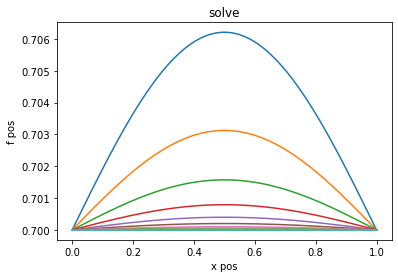

In [12]:
# Solving
for i in logProg( range(n_dt),every=1):
    time_current += dt
       
    fe.solve(weak_form_left == weak_form_right, f_sol, boundary_condition)
    f0.assign(f_sol)
    
    fe.plot(f_sol, label=f't={time_current:1.1f}')

# plt.legend()
plt.title("solve")
plt.xlabel('x pos')
plt.ylabel('f pos')